# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Farida Sherif Eissa

ID: 55-4986

Tutorial:T-7

---

Name: Amaal Asser

ID: 55-4985

Tutorial: T-7

---

Name:

ID:

Tutorial:

---


## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service*)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service**)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

\* No phone service means the customer's plan does not include calling (could be a data-only plan)

\*\* No internet service means the customer's plan does not include internet/data and so the addon package does not apply

## Importing Libraries & Dataset

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline
plt.style.use("ggplot")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2024/main/data/telecom_churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes


## Data Inspection

Firstly, for data inspection we inspected data throughly , by taking a random sample from dataset (10) rows , so that we can easily inspect data. Then , we searched for number of unique values , missing values (NaN values), column names ,data type of columns , Key statistics like mean and standard deviation ,number of duplicate rows and value counts for categorical columns

In [44]:
print(f"Dataset shape: {df.shape}")
print("\nRandom sample of the dataset:")
print(df.sample(10))  # here we are only taking just a sample randomly from dataset (10 rows)
print("\nNumber of unique values per column:")
print(df.nunique())
print("\nColumn names:")
print(df.columns.tolist())
print("\nMissing Values Summary:")
print(df.isnull().sum())
print("\nData Types of Columns:")
print(df.dtypes)
print("\nDescriptive Statistics for Numerical Columns:")
print(df.describe())
print("\nNumber of Duplicates:")
print(df.duplicated().sum())
print("\nValue Counts for Categorical Columns:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}:")
    print(df[col].value_counts())
    print()

Dataset shape: (7032, 21)

Random sample of the dataset:
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
2896  7765-LWVVH  Female              0     Yes        Yes      72   
1435  7677-SJJJK    Male              0     Yes        Yes       8   
1694  6223-DHJGV  Female              0      No         No      42   
3241  8806-EAGWC    Male              0      No         No       3   
3990  6023-GSSXW  Female              0     Yes         No      69   
923   5393-HJZSM  Female              0     Yes        Yes      32   
6438  8782-NUUOL    Male              0      No         No      60   
1393  3569-EDBPQ  Female              0      No         No      24   
1127  8257-RZAHR  Female              0     Yes         No      14   
328   5697-GOMBF  Female              1     Yes        Yes      28   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
2896          Yes               Yes     Fiber optic                  Yes  ...   
1435      

## Data Cleaning

Here we did data cleasing , and we made sure to handle missing values, replacing values to be able to convert ,for instance string format with a currency symbol ($) and other non-numeric characters,also we handled duplicates, correcting data types and handle outliers (if necessary) , for instance, we can use a simple method like removing data points that are too far from the mean

In [45]:
print(df.head())
print("Missing Values Summary Before Cleaning:")
print(df.isnull().sum())
df['MonthlyCharges'] = df['MonthlyCharges'].replace({'\$': '', '/m': ''}, regex=True)
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['MonthlyCharges'] = df['MonthlyCharges'].fillna(df['MonthlyCharges'].mean())

df['TotalCharges'] = df['TotalCharges'].replace({'\$': '', '/m': ''}, regex=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())
df['PaymentMethod'] = df['PaymentMethod'].fillna(df['PaymentMethod'].mode()[0])
print(f"Number of Duplicates Before Cleaning: {df.duplicated().sum()}")
df = df.drop_duplicates()
print("\nData Types Before Cleaning:")
print(df.dtypes)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
mean_monthly_charges = df['MonthlyCharges'].mean()
std_monthly_charges = df['MonthlyCharges'].std()
df = df[(df['MonthlyCharges'] >= mean_monthly_charges - 3 * std_monthly_charges) &
        (df['MonthlyCharges'] <= mean_monthly_charges + 3 * std_monthly_charges)]
mean_total_charges = df['TotalCharges'].mean()
std_total_charges = df['TotalCharges'].std()
print("\nData Types After Cleaning:")
print(df.dtypes)
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())
print(f"Number of Duplicates After Cleaning: {df.duplicated().sum()}")

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

## Exploratory Data Analysis

**Q1: What are the most correlated attributes with customer churn?**

**Visualization**

**Answer for Q1**: Your answer here

**Q2: Which payment method has the highest churn rate?**

**Visualization**

**Answer for Q2**: Your answer here

**Q3: After how many months do customers commonly churn?** (Hint: show and interpret the distribution)

**Visualization**

**Answer for Q3**: Your answer here

## Data Preparation for Modelling

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

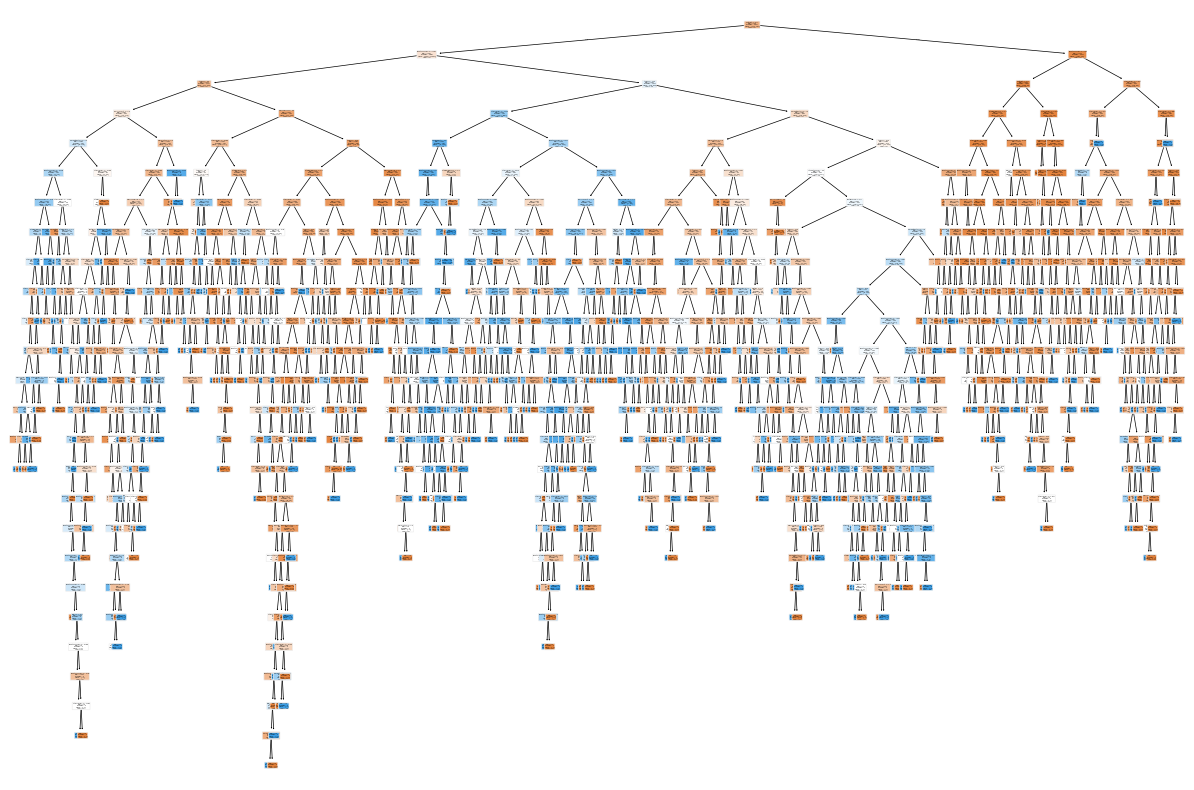

In [46]:
print(df.head())

# Step 2: Missing Values Handling
print("Missing Values Summary Before Cleaning:")
print(df.isnull().sum())

# Fill missing values for numerical columns with the mean
df['MonthlyCharges'] = df['MonthlyCharges'].replace({'\$': '', '/m': ''}, regex=True)
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['MonthlyCharges'] = df['MonthlyCharges'].fillna(df['MonthlyCharges'].mean())

df['TotalCharges'] = df['TotalCharges'].replace({'\$': '', '/m': ''}, regex=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

# Fill missing values for categorical columns with the mode (most frequent value)
df['PaymentMethod'] = df['PaymentMethod'].fillna(df['PaymentMethod'].mode()[0])

# Step 3: Handle Duplicates
# Check for duplicates in the dataset
print(f"Number of Duplicates Before Cleaning: {df.duplicated().sum()}")

# Remove duplicates
df = df.drop_duplicates()

# Step 4: Correcting Data Types
# Check if the data types of columns are correct
print("\nData Types Before Cleaning:")
print(df.dtypes)

# Example: If 'TotalCharges' is recognized as a string, convert it to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Step 5: Handle Outliers (if necessary)
# For numerical columns, you might want to handle outliers, e.g., by removing or capping them
# Example: Remove rows where 'MonthlyCharges' is more than 3 standard deviations away from the mean
mean_monthly_charges = df['MonthlyCharges'].mean()
std_monthly_charges = df['MonthlyCharges'].std()
df = df[(df['MonthlyCharges'] >= mean_monthly_charges - 3 * std_monthly_charges) &
        (df['MonthlyCharges'] <= mean_monthly_charges + 3 * std_monthly_charges)]

# Step 6: Summary After Cleaning
print("\nData Types After Cleaning:")
print(df.dtypes)
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())
print(f"Number of Duplicates After Cleaning: {df.duplicated().sum()}")

# Continue with your analysis (e.g., split the data, model training, etc.)

# Handle missing values and encode categorical columns
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

# Apply LabelEncoder to each categorical column using .loc
for col in categorical_cols:
    df.loc[:, col] = label_encoder.fit_transform(df[col])

# Feature selection
features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
            'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
            'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
target = 'Churn'

# Prepare features and target
X = df[features]
y = df[target]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[['MonthlyCharges', 'TotalCharges']])  # Scale only the numerical columns

# Replace the scaled columns back into X using .loc
X.loc[:, ['MonthlyCharges', 'TotalCharges']] = X_scaled

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shape of training and testing sets
print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")

# Model training (using DecisionTreeClassifier as an example)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=features, class_names=['No', 'Yes'], rounded=True)
plt.show()

## Modelling

Training set size: (4922, 19), Testing set size: (2110, 19)

Classification Report:
              precision    recall  f1-score   support

          No       0.80      0.79      0.79      1549
         Yes       0.44      0.46      0.45       561

    accuracy                           0.70      2110
   macro avg       0.62      0.62      0.62      2110
weighted avg       0.70      0.70      0.70      2110


Confusion Matrix:
[[1218  331]
 [ 303  258]]


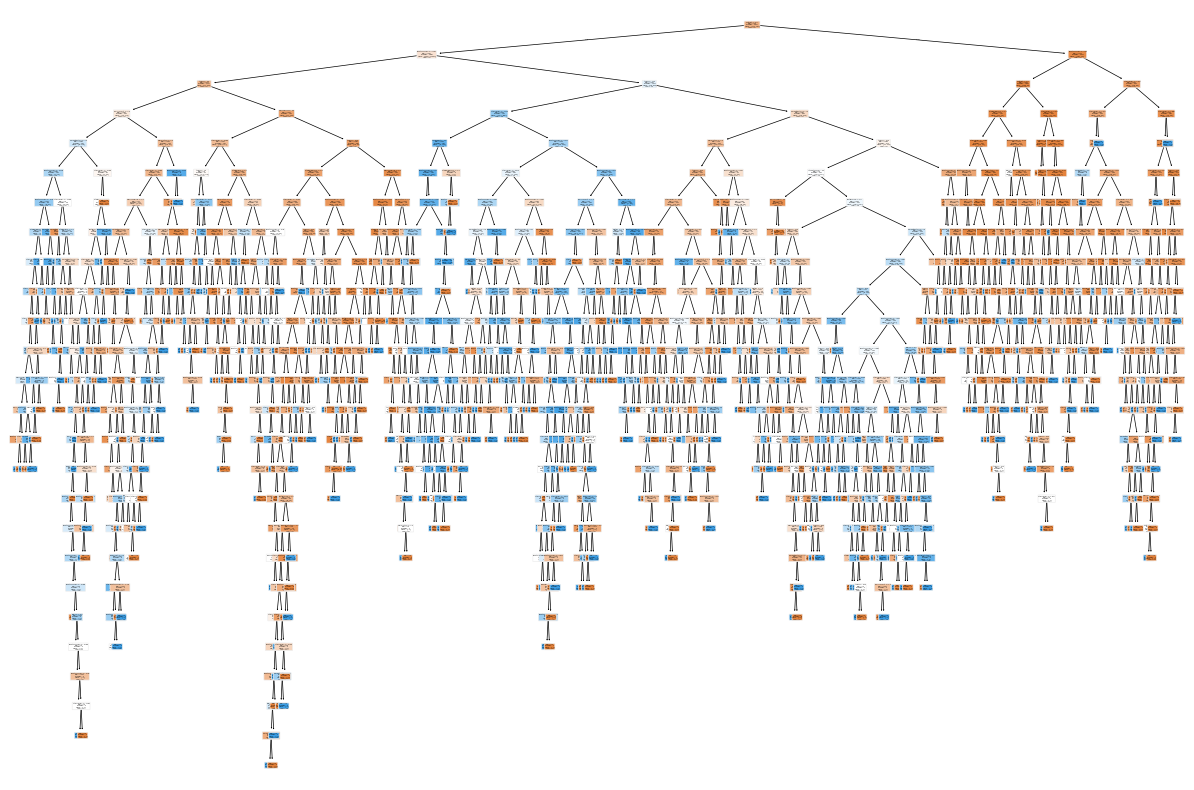

In [53]:
# Feature selection
features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
            'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
            'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
target = 'Churn'

# Prepare features and target
X = df[features]
y = df[target]

# Scaling the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[['MonthlyCharges', 'TotalCharges']])

# Replace the scaled columns back into X
X.loc[:, ['MonthlyCharges', 'TotalCharges']] = X_scaled

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shape of training and testing sets
print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")

# Model training (using DecisionTreeClassifier)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=features, class_names=['No', 'Yes'], rounded=True)
plt.show()


Tree Visualization

In [42]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/GUC-DM/W2024/main/data/telecom_churn.csv")

# Drop irrelevant columns
df = df.drop(columns=['customerID'])

# Convert target column to binary
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Convert categorical variables to numerical using LabelEncoder
categorical_cols = df.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split data
X = df.drop(columns=['Churn'])
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=4, random_state=42)

## Evaluation

Accuracy: 0.6909952606635071
              precision    recall  f1-score   support

           0       0.81      0.76      0.78      1549
           1       0.43      0.50      0.46       561

    accuracy                           0.69      2110
   macro avg       0.62      0.63      0.62      2110
weighted avg       0.71      0.69      0.70      2110



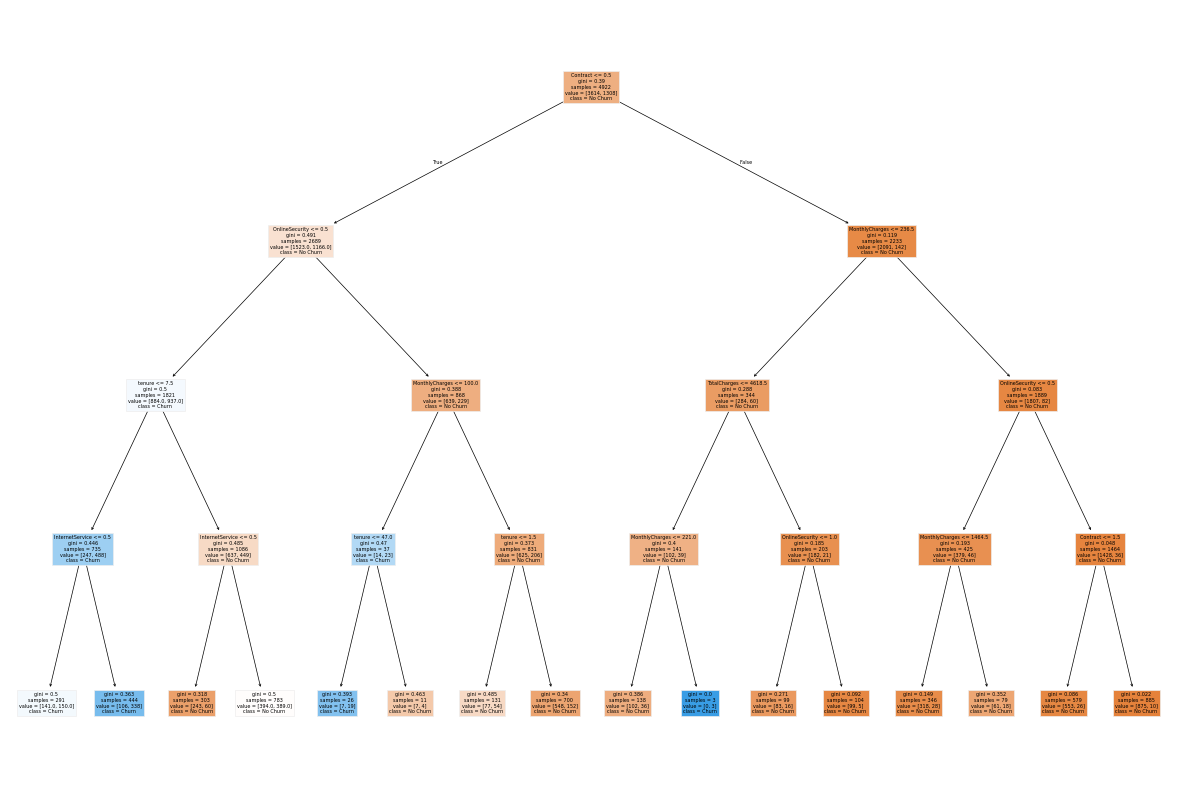

|--- Contract <= 0.50
|   |--- OnlineSecurity <= 0.50
|   |   |--- tenure <= 7.50
|   |   |   |--- InternetService <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- InternetService >  0.50
|   |   |   |   |--- class: 1
|   |   |--- tenure >  7.50
|   |   |   |--- InternetService <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- InternetService >  0.50
|   |   |   |   |--- class: 0
|   |--- OnlineSecurity >  0.50
|   |   |--- MonthlyCharges <= 100.00
|   |   |   |--- tenure <= 47.00
|   |   |   |   |--- class: 1
|   |   |   |--- tenure >  47.00
|   |   |   |   |--- class: 0
|   |   |--- MonthlyCharges >  100.00
|   |   |   |--- tenure <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- tenure >  1.50
|   |   |   |   |--- class: 0
|--- Contract >  0.50
|   |--- MonthlyCharges <= 236.50
|   |   |--- TotalCharges <= 4618.50
|   |   |   |--- MonthlyCharges <= 221.00
|   |   |   |   |--- class: 0
|   |   |   |--- MonthlyCharges >  221.00
|   |   |   |   |--- class: 1
|   |   |--

In [49]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import export_text

# Ensure the target variable is encoded as integers (0 for No Churn, 1 for Churn)
y_test_encoded = y_test.map({'No': 0, 'Yes': 1})
y_pred_encoded = y_pred  # These are already in integer format

# Evaluate performance
print(f"Accuracy: {accuracy_score(y_test_encoded, y_pred_encoded)}")
print(classification_report(y_test_encoded, y_pred_encoded))

# Visualization of the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['No Churn', 'Churn'], filled=True)
plt.show()

# Display the decision rules
tree_rules = export_text(dt_model, feature_names=list(X.columns))
print(tree_rules)


## Display

## Bonus (Optional)

In [52]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Ensure the target variable is encoded as integers (0 for No Churn, 1 for Churn)
y_test_encoded = y_test.map({'No': 0, 'Yes': 1})

# Encode predictions to integers (using numpy's vectorize or direct mapping)
rf_y_pred_encoded = np.where(rf_y_pred == 'No', 0, 1)  # Convert 'No' to 0 and 'Yes' to 1

# Evaluate the Random Forest model
print("Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test_encoded, rf_y_pred_encoded)}")
print(classification_report(y_test_encoded, rf_y_pred_encoded))

# Compare with Decision Tree
print("\nComparison:")
print("Decision Tree Performance:")
# Ensure y_pred is also encoded when comparing (same method for encoding)
y_pred_encoded = np.where(y_pred == 'No', 0, 1)  # Convert 'No' to 0 and 'Yes' to 1
print(f"Accuracy: {accuracy_score(y_test_encoded, y_pred_encoded)}")
print(classification_report(y_test_encoded, y_pred_encoded))

# Choosing the Model
if accuracy_score(y_test_encoded, rf_y_pred_encoded) > accuracy_score(y_test_encoded, y_pred_encoded):
    print("\nChosen Model: Random Forest")
    print("Reason: Higher accuracy and better overall performance.")
else:
    print("\nChosen Model: Decision Tree")
    print("Reason: Similar accuracy with simpler interpretability.")


Random Forest Performance:
Accuracy: 0.7796208530805687
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1549
           1       0.62      0.44      0.51       561

    accuracy                           0.78      2110
   macro avg       0.72      0.67      0.69      2110
weighted avg       0.76      0.78      0.77      2110


Comparison:
Decision Tree Performance:
Accuracy: 0.26587677725118486
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1549
           1       0.27      1.00      0.42       561

    accuracy                           0.27      2110
   macro avg       0.13      0.50      0.21      2110
weighted avg       0.07      0.27      0.11      2110


Chosen Model: Random Forest
Reason: Higher accuracy and better overall performance.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
